In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
house_sales = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv')

In [ ]:
house_sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_sales.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


# **Data Manipulation**
Checking for missing values

In [ ]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Dropping not required columns**

In [ ]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_sales.drop(['id','date'],axis = 1, inplace=True)      #dont execute twice

In [ ]:
house_sales.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **Data Preprocessing**
Assumptions in Linear Regression Model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


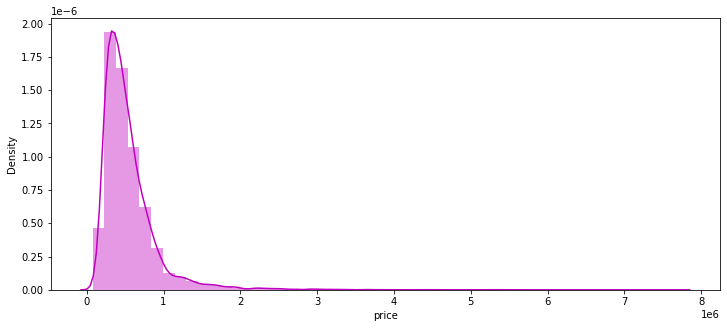

In [ ]:
plt.figure(figsize=(12,5))    #12: width , 5: height
sns.distplot(house_sales['price'],color='m')

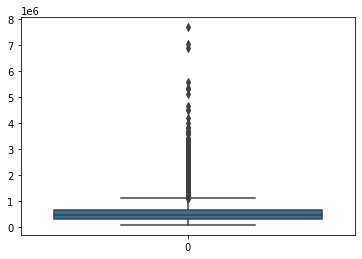

In [ ]:
sns.boxplot(data= house_sales['price'])
plt.show()

# **Feature Selection**
Correlation

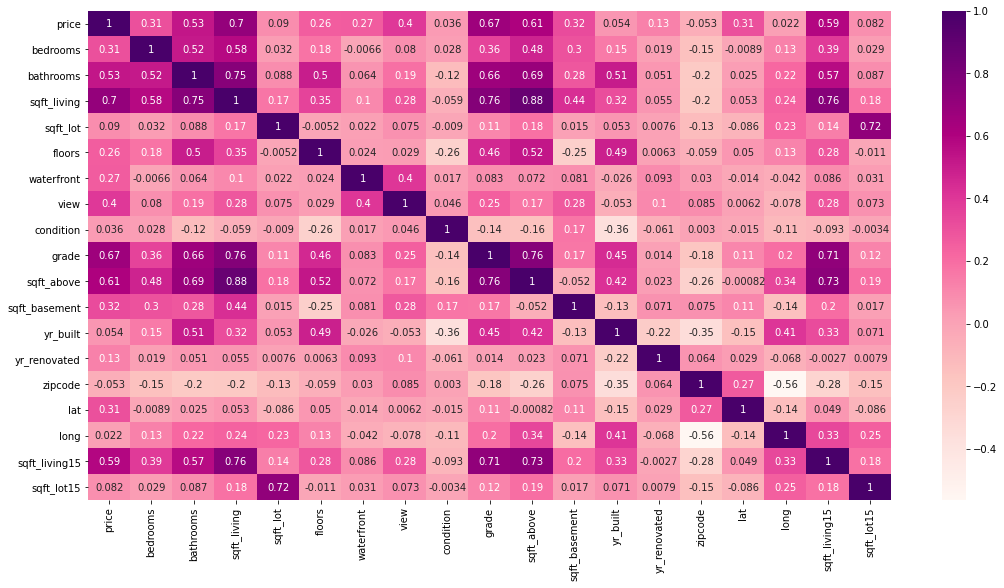

In [ ]:
#We eliminate columns that have relation close to 0
#look for multicollinearity that is greater than 0.85 and delete one column which is weaker
plt.figure(figsize=(18,9))
sns.heatmap(house_sales.corr(),annot=True,cmap='RdPu')

In [ ]:
#sqft_living and sqft_above have multicollinearity 0.88 so delete one which has weaker felation with target(price)
house_df = house_sales.drop(['sqft_lot','condition', 'sqft_above', 'zipcode', 'yr_renovated','long', 'sqft_lot15'], axis = 1)
house_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,0,1955,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,400,1951,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,0,1933,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,910,1965,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,0,1987,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,0,2009,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,0,2014,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,0,2009,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,0,2004,47.5345,1410


 **Splitting X and Y**

In [ ]:
X = house_df.drop(['price'], axis = 1)

In [ ]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,yr_built,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,0,1955,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,400,1951,47.7210,1690
2,2,1.00,770,1.0,0,0,6,0,1933,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,910,1965,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,0,1987,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,0,2009,47.6993,1530
21609,4,2.50,2310,2.0,0,0,8,0,2014,47.5107,1830
21610,2,0.75,1020,2.0,0,0,7,0,2009,47.5944,1020
21611,3,2.50,1600,2.0,0,0,8,0,2004,47.5345,1410


In [ ]:
Y = house_df['price']

# **Data Preprocessing**
Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [ ]:
scaler.fit(X)                #Training of X

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_X = scaler.transform(X)

In [ ]:
scaled_X

array([[0.09090909, 0.125     , 0.06716981, ..., 0.47826087, 0.57149751,
        0.16193426],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.44347826, 0.90895931,
        0.22216486],
       [0.06060606, 0.125     , 0.03622642, ..., 0.28695652, 0.93614283,
        0.3994149 ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.94782609, 0.70532411,
        0.10686629],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.90434783, 0.60897539,
        0.17398038],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.93913043, 0.70484156,
        0.10686629]])

# **Split into Train and Test -Crosss validation**
Random Selection -train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train , Y_test = train_test_split(scaled_X,Y , test_size =0.2 ,random_state = 9)   #test_size will divide data in 80 and 20   , for accuracy change random_state from 0-9 , so random state basically signifies how randomly train and test data is split


# **LR Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize = True)

In [ ]:
# Training of model using training dataset
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Accuracy
lr_model.score(X_test, Y_test)

0.7088301121634378

**Regression Metrics**

In [ ]:
# Make Predictions
yhat = lr_model.predict(X_test)

In [ ]:
display(yhat)

array([ 111275.60500211,  433770.06458339,  409937.91688297, ...,
       1191727.81405996,  160971.51977933,  193867.47291831])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# range of r2_scaore (0-1)
r2_score(Y_test, yhat)


0.7088301121634378

In [ ]:
mean_squared_error(Y_test, yhat)

40755299803.138145

In [ ]:
mean_absolute_error(Y_test, yhat)

126375.07380617839

**Coefficient and Intercept**

In [ ]:
lr_model.coef_

array([-995926.4817264 ,  395197.81306743, 2183215.40921991,
         15217.16598524,  590347.43623037,  210112.97659178,
       1212924.78843541,  -97968.44387992, -357296.9870682 ,
        345449.20302276,  131662.05365095])

In [ ]:
lr_model.intercept_

-484861.1266783131

# **Making Predicton for new sample**

In [ ]:
X_new = [[3,	2.50,	1770,	1.0,	0,	0,	6,	0,	2014,	47.7379,	2720]]

In [ ]:
X_scaled = scaler.transform(X_new)

In [ ]:
np.round(lr_model.predict(X_scaled))

array([319133.])